In [22]:
from IPython.display import display

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import warnings
from tabulate import tabulate
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("whitegrid")

#import data
diab = pd.read_csv("diab.csv")
# Assuming FAA_merged is your merged DataFrame
duplicates = diab[diab.duplicated()]

# Print or handle the duplicates as needed
if not duplicates.empty:
    print("Duplicate rows found:")
    display(duplicates)
else:
    print("No duplicate rows found.")

Duplicate rows found:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [2]:
diab

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
diab = diab.drop_duplicates()

In [4]:
diab.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


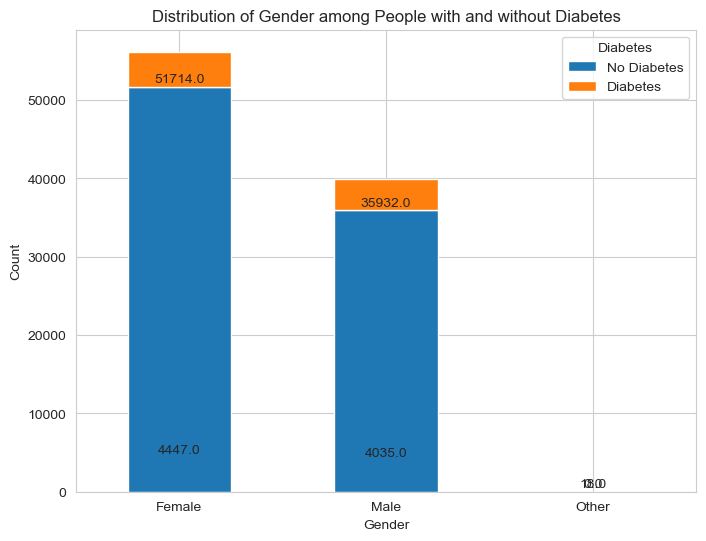

In [6]:
# Grouping by gender and diabetes status and counting occurrences
grouped = diab.groupby(['gender', 'diabetes']).size().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
grouped.plot(kind='bar', stacked=True, ax=ax)
plt.title('Distribution of Gender among People with and without Diabetes')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.xticks(rotation=0)
# Adding value annotations on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

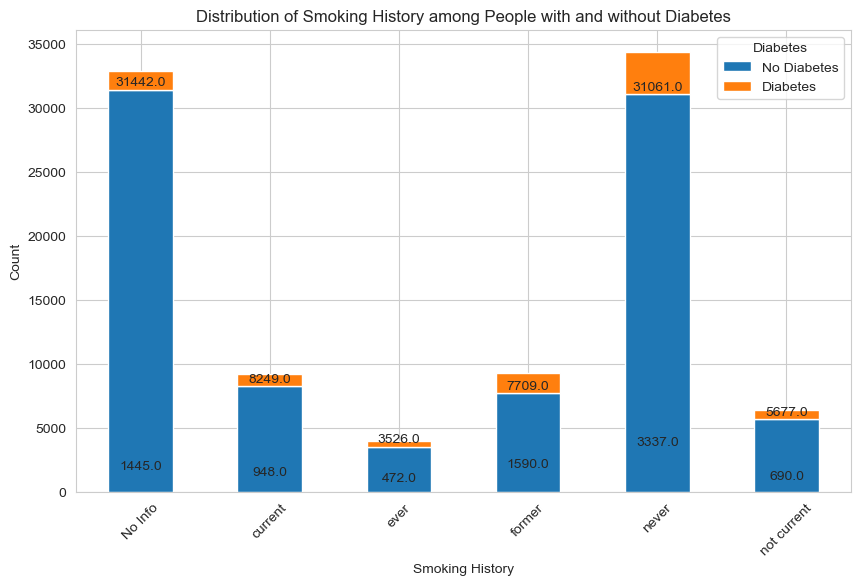

In [7]:
# Grouping by smoking history and diabetes status and counting occurrences
grouped_smoking = diab.groupby(['smoking_history', 'diabetes']).size().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
grouped_smoking.plot(kind='bar', stacked=True, ax=ax)
plt.title('Distribution of Smoking History among People with and without Diabetes')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.xticks(rotation=45)

# Adding value annotations on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [8]:
# Count the occurrences of each unique value in the 'gender' column
gender_counts = diab['gender'].value_counts()

# Get the count for the "other" category
other_count = gender_counts.get('Other', 0)

print("Number of rows with 'other' gender value:", other_count)

Number of rows with 'other' gender value: 18


In [9]:
diab = diab[diab['gender'] != 'Other']

In [10]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [11]:
# Define the mapping for replacement
smoking_mapping = {
    'never': 'non-smoker',
    'No Info': 'non-smoker',
    'not current': 'past-smoker',
    'former': 'past-smoker',
    'ever': 'past-smoker',
    'current': 'current-smoker'
}

# Replace values in the 'smoking_history' column
diab['smoking_history'] = diab['smoking_history'].replace(smoking_mapping)

In [12]:
diab

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0
3,Female,36.0,0,0,current-smoker,23.45,5.0,155,0
4,Male,76.0,1,1,current-smoker,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,non-smoker,24.60,4.8,145,0
99996,Female,2.0,0,0,non-smoker,17.37,6.5,100,0
99997,Male,66.0,0,0,past-smoker,27.83,5.7,155,0
99998,Female,24.0,0,0,non-smoker,35.42,4.0,100,0


In [13]:
diab.nunique()

gender                    2
age                     102
hypertension              2
heart_disease             2
smoking_history           3
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

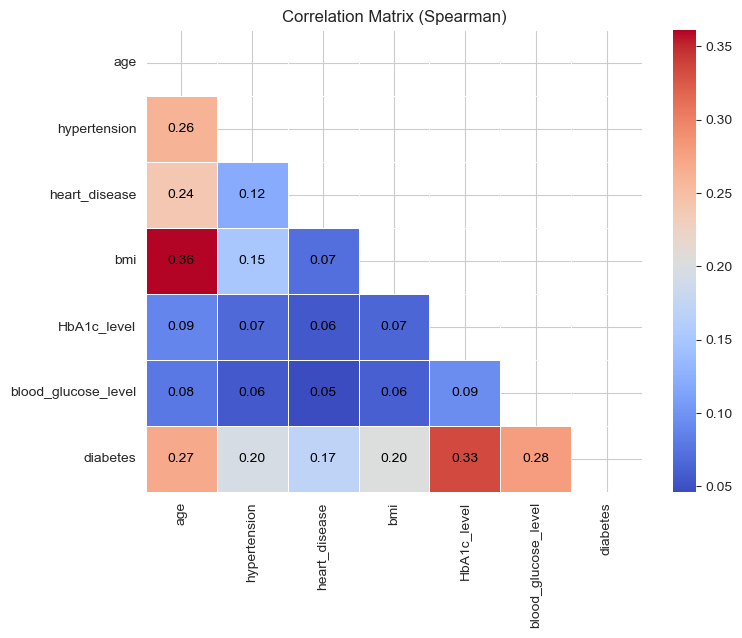

In [14]:
# Look at correlations between numeric features
num = diab.select_dtypes(include=np.number)
corx = num.corr(method="spearman")

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corx, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot the correlation matrix using seaborn heatmap
sns.heatmap(corx, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)

# Manually annotate the heatmap with correlation values
for i in range(len(corx)):
    for j in range(len(corx)):
        if i != j and not mask[i, j]:
            plt.text(j + 0.5, i + 0.5, f"{corx.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.title("Correlation Matrix (Spearman)")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Encode categorical variables
label_encoder = LabelEncoder()
diab['smoking_history'] = label_encoder.fit_transform(diab['smoking_history'])
diab['gender'] = label_encoder.fit_transform(diab['gender'])

# Split the data into features (X) and target variable (y)
X = diab.drop(columns=['diabetes'])
y = diab['diabetes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.9533
K-Nearest Neighbors Accuracy: 0.9518
Random Forest Accuracy: 0.9661
AdaBoost Accuracy: 0.9691
Naive Bayes Accuracy: 0.8991
XGBoost Accuracy: 0.9681


In [18]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Define hyperparameter grid for XGBoost
param_grid_xgboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}

# Perform grid search for AdaBoost
grid_search_adaboost = GridSearchCV(AdaBoostClassifier(), param_grid_adaboost, cv=5)
grid_search_adaboost.fit(X_train, y_train)

# Perform grid search for XGBoost
grid_search_xgboost = GridSearchCV(XGBClassifier(), param_grid_xgboost, cv=5)
grid_search_xgboost.fit(X_train, y_train)

# Get best hyperparameters and accuracy for AdaBoost
best_params_adaboost = grid_search_adaboost.best_params_
best_accuracy_adaboost = grid_search_adaboost.best_score_

# Get best hyperparameters and accuracy for XGBoost
best_params_xgboost = grid_search_xgboost.best_params_
best_accuracy_xgboost = grid_search_xgboost.best_score_

print("Best hyperparameters for AdaBoost:", best_params_adaboost)
print("Best accuracy for AdaBoost:", best_accuracy_adaboost)
print("Best hyperparameters for XGBoost:", best_params_xgboost)
print("Best accuracy for XGBoost:", best_accuracy_xgboost)

Best hyperparameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Best accuracy for AdaBoost: 0.9713011146696197
Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best accuracy for XGBoost: 0.9713141278707649


In [19]:
from sklearn.metrics import accuracy_score

# Initialize AdaBoost and XGBoost models with best hyperparameters
best_adaboost = AdaBoostClassifier(**best_params_adaboost)
best_xgboost = XGBClassifier(**best_params_xgboost)

# Retrain models on the entire training dataset
best_adaboost.fit(X_train, y_train)
best_xgboost.fit(X_train, y_train)

# Predict on the test set
y_pred_adaboost = best_adaboost.predict(X_test)
y_pred_xgboost = best_xgboost.predict(X_test)

# Evaluate model performance on the test set
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)

print("Accuracy of AdaBoost on test set:", accuracy_adaboost)
print("Accuracy of XGBoost on test set:", accuracy_xgboost)

Accuracy of AdaBoost on test set: 0.9692603765733901
Accuracy of XGBoost on test set: 0.9699885571621762


In [20]:
import joblib

# Save the trained XGBoost model to a file
joblib.dump(best_xgboost, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [42]:
import pickle

# Save the model to disk
filename = 'finalized_xgboost_model.sav'
pickle.dump(best_xgboost, open(filename, 'wb'))

In [43]:
import numpy as np
import pickle

# Load the model from disk
filename = 'finalized_xgboost_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Example custom input values
# Assuming the order of features: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history_encoded', 'bmi', 'HbA1c_level', 'blood_glucose_level']
custom_input = np.array([[1, 50, 0, 0, 1, 25.5, 6.8, 165]])  # Replace these values with your actual input

# Predict using the loaded model
prediction = loaded_model.predict(custom_input)

# Output prediction
print("Predicted Class:", "Diabetes" if prediction[0] == 1 else "No Diabetes")

Predicted Class: No Diabetes


In [44]:
custom_input = np.array([[1, 50, 0, 0, 1, 25.5, 6.8, 165]])  # Replace these values with your actual input

# Predict using the loaded model
prediction = loaded_model.predict(custom_input)

# Output prediction
print("Predicted Class:", "Diabetes" if prediction[0] == 1 else "No Diabetes")

Predicted Class: Diabetes
